# Global COVID-19 Mortality by Continent - Using Python/Pandas 
Dataset From https://covid.ourworldindata.org/data/owid-covid-data.csv

In [1]:
import pandas as pd


In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
#Load The Data Set From Local Directory

In [5]:
get_filePath = pd.read_csv("owid-covid-data.csv")

In [6]:
Data = get_filePath

In [7]:
#Explore The Data Set

In [8]:
Data.shape

(255834, 67)

In [9]:
Data.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [10]:
Data.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [11]:
#DATA CLEANING - Remove Duplicates - Remove Missing Data - Fill Missing With 0

In [12]:
DataDrop = Data.drop_duplicates()

In [13]:
CleanData = DataDrop.dropna(axis=1, how='all')

In [14]:
CleanData = CleanData.fillna(0)

In [15]:

CleanData.fillna(0)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255829,ZWE,Africa,Zimbabwe,2023-02-03,262324.0,0.0,0.0,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
255830,ZWE,Africa,Zimbabwe,2023-02-04,262324.0,0.0,0.0,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
255831,ZWE,Africa,Zimbabwe,2023-02-05,262324.0,0.0,0.0,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
255832,ZWE,Africa,Zimbabwe,2023-02-06,262324.0,0.0,0.0,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0


In [16]:
CleanData.size

17140878

In [17]:
CleanData.isna().any().sum()

0

In [18]:
CleanData.isnull().any().sum()

0

In [19]:
#Data Type Conversion - Float to Integers ~ Date to Date Time

In [20]:

CleanData = CleanData.astype({'total_cases':'int','new_cases':'int','new_cases_smoothed':'int','total_deaths':'int','new_deaths':'int','new_deaths_smoothed':'int','total_cases_per_million':'int','new_cases_per_million':'int','new_cases_smoothed_per_million':'int','total_deaths_per_million':'int','male_smokers':'int','handwashing_facilities':'int','hospital_beds_per_thousand':'int','life_expectancy':'int','population':'int','excess_mortality_cumulative_absolute':'int','excess_mortality':'int'})

In [21]:
CleanData['date'] = CleanData['date'].astype('datetime64[ns]')

In [22]:
CleanData.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                         int64
                                                ...      
population                                          int64
excess_mortality_cumulative_absolute                int64
excess_mortality_cumulative                       float64
excess_mortality                                    int64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [23]:
#Filtering selected columns into a new dataframe

In [24]:
Filtered_Data = CleanData.filter(items = ['continent','location','date','total_cases','new_cases','total_deaths','new_deaths','population'])

In [43]:
Filtered_Data["continent"].value_counts()

Europe           58534
Africa           58063
Asia             54368
North America    38367
Oceania          18215
South America    13924
Name: continent, dtype: int64

In [ ]:
#Manipulating The Continent Column - Aim To Visiualize Total Deaths/Total Cases By Continents

In [44]:
ConFilter = Filtered_Data

In [28]:
XCont = Filtered_Data.continent.str.replace("0","No")

In [29]:
XCont.value_counts()

Europe           58534
Africa           58063
Asia             54368
North America    38367
Oceania          18215
South America    13924
Name: continent, dtype: int64

In [30]:
ConFilter['continent'] = XCont

In [31]:
ConFilter.head(2)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Asia,Afghanistan,2020-02-24,5,5,0,0,41128772
1,Asia,Afghanistan,2020-02-25,5,0,0,0,41128772


In [49]:
# Group the data by continents
grouped_data = ConFilter.groupby('continent')

In [72]:
# Calculate the total cases per million people
total_cases = grouped_data['total_cases'].sum()


<Axes: ylabel='total_cases'>

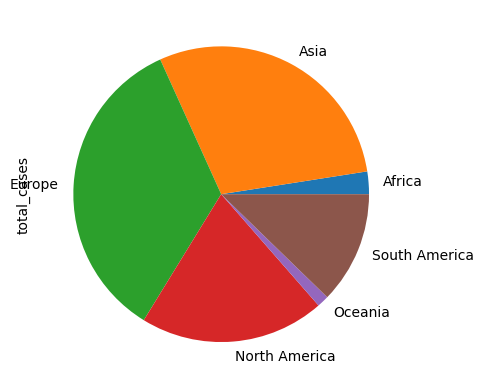

In [73]:
total_cases.plot.pie()

In [70]:
total_deaths = grouped_data['total_deaths'].sum()


<Axes: ylabel='total_deaths'>

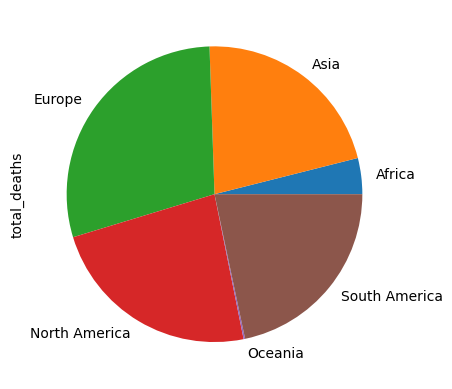

In [71]:
total_deaths.plot.pie()

In [78]:
# Get the max cases per million people for each continent
cases_per_cont= ConFilter.groupby('continent')['total_cases'].max()



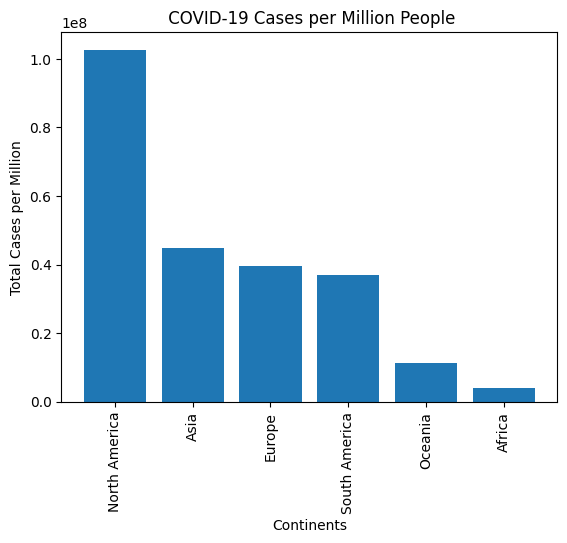

In [80]:
plt.bar(top_10_cases.index, top_10_cases.values)
plt.xticks(rotation=90)
plt.xlabel('Continents')
plt.ylabel('Total Cases per Million')
plt.title(' COVID-19 Cases per Million People')
plt.show()
